## [Hannewald04](https://journals.aps.org/prb/abstract/10.1103/PhysRevB.69.075212)
Anisotropy Effects in Phonon-Assisted Charge-Carrier Transport in Organic Molecular Crystals. K. Hannewald and P. A. Bobbert. *Phys. Rev. B* **2004**, *69*, 075212.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import trapz

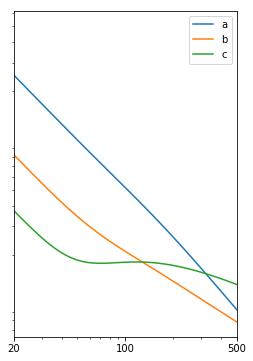

In [6]:
omega = 15e-3 / 27.2
g_eff = 1
t = np.linspace(0, 1e6, 100000)
broadening = np.exp(-(0.1e-3/27.2*t)**2)
T_list = np.logspace(1, 2.7)


a = 7 / 0.52
g_a = 0.2
E_a = 10.0e-3 / 27.2

b = 8 / 0.52
g_b = 0.3
E_b = 5.0e-3 / 27.2

c = 9 / 0.52
g_c = 0.4
E_c = 3.0e-3 / 27.2

plt.figure(figsize=(4, 6))
for x, g_x, E_x, label in [[a, g_a, E_a, "a"], [b, g_b, E_b, "b"], [c, g_c, E_c, "c"]]:
    mobility_list = []
    for T in (T_list * 3.166e-6):
        N_ph = 1 / (np.exp(omega / T)-1)
        phi_ph = (1 + N_ph) * np.exp(-1j * omega * t) + N_ph * np.exp(1j * omega * t)
        gamma_ph = 2 * g_eff ** 2 * (1 + 2 * N_ph - phi_ph)
        integrand = (E_x ** 2 + 0.5 * (omega * g_x) ** 2 * phi_ph ) * np.exp(-gamma_ph)
        m = 2 * trapz((integrand * broadening).real, t)
        mobility_list.append(x ** 2 * m/T)
    plt.plot(T_list, mobility_list, label=label)
plt.xscale("log")
plt.yscale("log")
plt.xticks([20, 100, 500], [20, 100, 500])
plt.yticks([], [])
plt.xlim(20, 500)
plt.legend()